# Import the file

In [2]:
import pandas as pd
import zipfile

# Specify the path to your zip file and the Excel file inside it
zip_file_path = 'C:\\Users\\gui\\Desktop\\inputi.zip'
csv_file_name = 'data.csv'

# Extract the Excel file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extract(csv_file_name)

# Now read the extracted Excel file using pandas
data = pd.read_csv(csv_file_name)

# PCA 

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np


# Standardize the data
# PCA is influenced by scale, so you need to scale the features in your data before applying PCA.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA
num_components = 2  # specify the number of components you want to keep
pca = PCA(n_components=num_components)
principalComponents = pca.fit_transform(scaled_data)

# Convert to dataframe for easier manipulation
principalDf = pd.DataFrame(data=principalComponents, columns=[f'Principal Component {i}' for i in range(1, num_components+1)])

print(principalDf)

In [5]:
# Calculate the standard deviation for each principal component
std_devs = principalDf.std()
print(std_devs)

Principal Component 1    1.969605
Principal Component 2    0.998054
dtype: float64


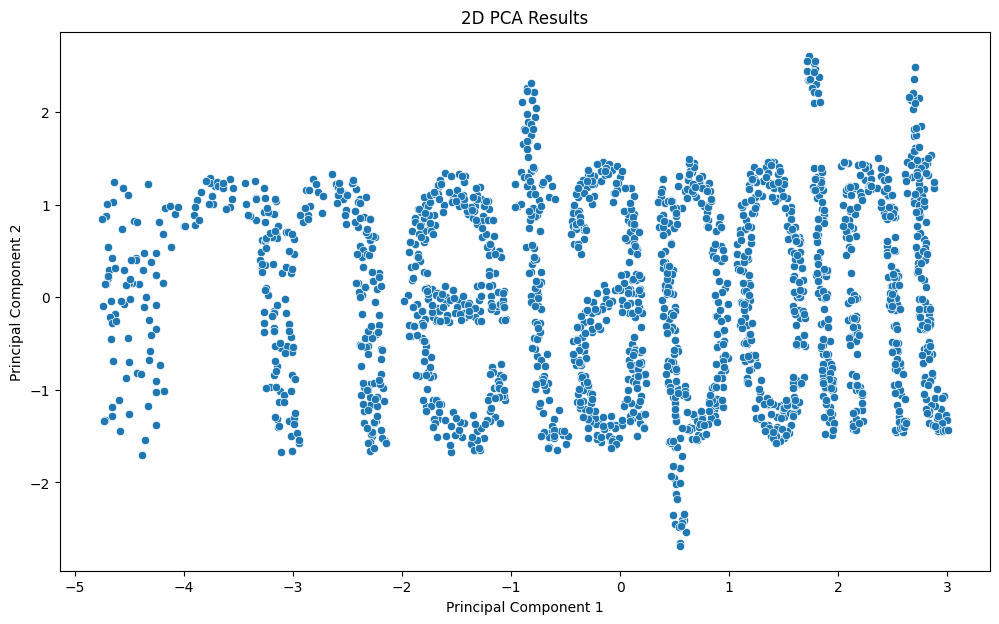

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 7))  # Here (12, 8) defines the width and height of the figure in inches. Adjust as needed.
principalDf = -principalDf



# Visualizing the first two principal components
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=principalDf)
plt.title('2D PCA Results')
plt.show()

# Tratamento do treino e teste usando data frames

In [7]:
# Specify the path to your zip file and the Excel file inside it
zip_file_path = 'C:\\Users\\gui\\Desktop'
csv_train = 'train_data.csv'
csv_test = "test_data.csv"



# Now read the extracted Excel file using pandas
train_data = pd.read_csv(csv_train)
test_data = pd.read_csv(csv_test)


In [8]:
display(train_data)

,MODE,POWER,AMPS,VOLTS,TEMP,UNIT,DELTA,GAMMA,OUTPUT
0,REDACTED,high,0.585,4.347,66.812,C,-0.659,-0.527,3.749
1,beam,low,0.687,2.412,-17.044,C,0.508,-0.371,-1.062
2,REDACTED,low,0.888,2.979,40.918,C,0.600,1.412,2.265
3,auto,low,0.114,0.754,-43.308,C,-0.760,-0.109,1.847
4,burst,high,0.318,3.955,37.752,C,-0.751,0.492,1.821
...,...,...,...,...,...,...,...,...,...
995,auto,low,0.350,4.257,274.581,K,0.991,-0.335,2.466
996,beam,low,0.644,1.128,-27.707,C,-0.529,0.034,-1.834
997,burst,low,0.887,1.418,201.560,?,0.729,-0.503,-0.188
998,REDACTED,low,0.323,0.291,-17.162,C,-0.120,0.524,0.081


In [9]:
display(test_data)

,MODE,POWER,AMPS,VOLTS,TEMP,UNIT,DELTA,GAMMA
0,REDACTED,high,0.126,7.489,14.284,C,-0.818,0.692
1,REDACTED,high,0.917,4.557,17.746,C,0.251,-0.709
2,REDACTED,high,0.508,2.928,-9.866,C,-0.273,1.056
3,auto,low,0.832,2.464,-32.047,C,0.145,-0.572
4,auto,low,0.501,2.711,1.349,C,0.431,-0.939
...,...,...,...,...,...,...,...,...
2495,REDACTED,high,0.639,2.318,-21.235,C,-0.786,0.399
2496,REDACTED,high,0.630,1.569,-12.947,C,0.768,-0.001
2497,auto,low,0.813,1.854,-29.502,C,-0.408,0.638
2498,auto,low,0.172,3.663,-0.141,C,0.595,0.995


In [10]:
clean_train_data = train_data.dropna()
print(clean_train_data)

         MODE POWER   AMPS  VOLTS     TEMP UNIT  DELTA  GAMMA  OUTPUT
0    REDACTED  high  0.585  4.347   66.812    C -0.659 -0.527   3.749
1        beam   low  0.687  2.412  -17.044    C  0.508 -0.371  -1.062
2    REDACTED   low  0.888  2.979   40.918    C  0.600  1.412   2.265
3        auto   low  0.114  0.754  -43.308    C -0.760 -0.109   1.847
4       burst  high  0.318  3.955   37.752    C -0.751  0.492   1.821
..        ...   ...    ...    ...      ...  ...    ...    ...     ...
995      auto   low  0.350  4.257  274.581    K  0.991 -0.335   2.466
996      beam   low  0.644  1.128  -27.707    C -0.529  0.034  -1.834
997     burst   low  0.887  1.418  201.560    ?  0.729 -0.503  -0.188
998  REDACTED   low  0.323  0.291  -17.162    C -0.120  0.524   0.081
999      beam  high  0.344  2.538  -32.986    C  0.075  0.840  -0.379

[984 rows x 9 columns]


In [11]:
# Get minimum and maximum values for each numeric column
min_values = clean_train_data.select_dtypes(include=[float, int]).min()
max_values = clean_train_data.select_dtypes(include=[float, int]).max()

# Display the range
for column, min_value in min_values.items():
    max_value = max_values[column]
    print(f"Column {column}: Range ({min_value}, {max_value})")

Column AMPS: Range (-99.0, 0.999)
Column VOLTS: Range (0.02, 8.7)
Column TEMP: Range (-100.0, 373.15)
Column DELTA: Range (-1.0, 0.991)
Column GAMMA: Range (-2.0, 2.0)
Column OUTPUT: Range (-8.323, 9.274)


In [12]:
low, high = 0, 1

# Filter rows where values in column 'B' are within the range
mask = (clean_train_data['AMPS'] >= low) & (clean_train_data['AMPS'] <= high)
data_filtered = clean_train_data[mask]

In [13]:
display(data_filtered)

,MODE,POWER,AMPS,VOLTS,TEMP,UNIT,DELTA,GAMMA,OUTPUT
0,REDACTED,high,0.585,4.347,66.812,C,-0.659,-0.527,3.749
1,beam,low,0.687,2.412,-17.044,C,0.508,-0.371,-1.062
2,REDACTED,low,0.888,2.979,40.918,C,0.600,1.412,2.265
3,auto,low,0.114,0.754,-43.308,C,-0.760,-0.109,1.847
4,burst,high,0.318,3.955,37.752,C,-0.751,0.492,1.821
...,...,...,...,...,...,...,...,...,...
995,auto,low,0.350,4.257,274.581,K,0.991,-0.335,2.466
996,beam,low,0.644,1.128,-27.707,C,-0.529,0.034,-1.834
997,burst,low,0.887,1.418,201.560,?,0.729,-0.503,-0.188
998,REDACTED,low,0.323,0.291,-17.162,C,-0.120,0.524,0.081


In [14]:
def kelvin_to_celsius(k):
    return k - 273.15

# Use a mask to identify rows where the unit is 'Kelvin' 
mask = data_filtered['UNIT'] == 'K'

# List to store temperatures converted from Kelvin to Celsius
converted_temps = data_filtered.loc[mask, 'TEMP'].tolist()

# Convert temperatures in these rows from Kelvin to Celsius
data_filtered.loc[mask, 'TEMP'] = data_filtered.loc[mask, 'TEMP'].apply(kelvin_to_celsius)

# Update the 'Unit' column for these rows to 'Celsius'
data_filtered.loc[mask, 'UNIT'] = 'C'

# Compute the mean and standard deviation of converted values
if converted_temps:
    converted_temps_celsius = [kelvin_to_celsius(temp) for temp in converted_temps]
    mean_converted = sum(converted_temps_celsius) / len(converted_temps_celsius)
    std_dev_converted = (sum([(x - mean_converted)**2 for x in converted_temps_celsius]) / len(converted_temps_celsius))**0.5
    print(f"Mean of converted temperatures: {mean_converted:.2f}")
    print(f"Standard deviation of converted temperatures: {std_dev_converted:.2f}")

Mean of converted temperatures: -0.69
Standard deviation of converted temperatures: 47.61


In [15]:
# Mask for rows with known Celsius values
celsius_mask = data_filtered['UNIT'] == 'C'
known_celsius_temps = data_filtered.loc[celsius_mask, 'TEMP']

# Determine the likely range for Celsius based on known Celsius values
min_celsius = known_celsius_temps.min()
max_celsius = known_celsius_temps.max()

# Mask for rows with '?' units
unknown_mask = data_filtered['UNIT'] == '?'

# Heuristic: If temperature is outside the range of known Celsius values, assume it's in Kelvin
for idx, row in data_filtered[unknown_mask].iterrows():
    temp = row['TEMP']
    if temp < min_celsius or temp > max_celsius:
        data_filtered.at[idx, 'TEMP'] = kelvin_to_celsius(temp)
    data_filtered.at[idx, 'UNIT'] = 'C'

In [16]:
display(data_filtered)

,MODE,POWER,AMPS,VOLTS,TEMP,UNIT,DELTA,GAMMA,OUTPUT
0,REDACTED,high,0.585,4.347,66.812,C,-0.659,-0.527,3.749
1,beam,low,0.687,2.412,-17.044,C,0.508,-0.371,-1.062
2,REDACTED,low,0.888,2.979,40.918,C,0.600,1.412,2.265
3,auto,low,0.114,0.754,-43.308,C,-0.760,-0.109,1.847
4,burst,high,0.318,3.955,37.752,C,-0.751,0.492,1.821
...,...,...,...,...,...,...,...,...,...
995,auto,low,0.350,4.257,1.431,C,0.991,-0.335,2.466
996,beam,low,0.644,1.128,-27.707,C,-0.529,0.034,-1.834
997,burst,low,0.887,1.418,-71.590,C,0.729,-0.503,-0.188
998,REDACTED,low,0.323,0.291,-17.162,C,-0.120,0.524,0.081


# Rede Neural

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

In [20]:
#Preprocessing 1
columns_to_drop = ['MODE', 'UNIT', 'POWER']  # replace with your column names
data = data_filtered.drop(columns=columns_to_drop)


In [46]:
display(data_filtered)

,MODE,POWER,AMPS,VOLTS,TEMP,UNIT,DELTA,GAMMA,OUTPUT
0,REDACTED,high,0.585,4.347,66.812,C,-0.659,-0.527,3.749
1,beam,low,0.687,2.412,-17.044,C,0.508,-0.371,-1.062
2,REDACTED,low,0.888,2.979,40.918,C,0.600,1.412,2.265
3,auto,low,0.114,0.754,-43.308,C,-0.760,-0.109,1.847
4,burst,high,0.318,3.955,37.752,C,-0.751,0.492,1.821
...,...,...,...,...,...,...,...,...,...
995,auto,low,0.350,4.257,1.431,C,0.991,-0.335,2.466
996,beam,low,0.644,1.128,-27.707,C,-0.529,0.034,-1.834
997,burst,low,0.887,1.418,-71.590,C,0.729,-0.503,-0.188
998,REDACTED,low,0.323,0.291,-17.162,C,-0.120,0.524,0.081


In [61]:
#Preprocessing 2
data_1 = data_filtered
data = pd.get_dummies(data_1, columns=['MODE', 'POWER'])
data.drop(columns=['UNIT'], inplace=True)

In [62]:
display(data)

,AMPS,VOLTS,TEMP,DELTA,GAMMA,OUTPUT,MODE_REDACTED,MODE_auto,MODE_beam,MODE_burst,POWER_high,POWER_low
0,0.585,4.347,66.812,-0.659,-0.527,3.749,1,0,0,0,1,0
1,0.687,2.412,-17.044,0.508,-0.371,-1.062,0,0,1,0,0,1
2,0.888,2.979,40.918,0.600,1.412,2.265,1,0,0,0,0,1
3,0.114,0.754,-43.308,-0.760,-0.109,1.847,0,1,0,0,0,1
4,0.318,3.955,37.752,-0.751,0.492,1.821,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.350,4.257,1.431,0.991,-0.335,2.466,0,1,0,0,0,1
996,0.644,1.128,-27.707,-0.529,0.034,-1.834,0,0,1,0,0,1
997,0.887,1.418,-71.590,0.729,-0.503,-0.188,0,0,0,1,0,1
998,0.323,0.291,-17.162,-0.120,0.524,0.081,1,0,0,0,0,1


In [69]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Print correlation matrix
print(correlation_matrix)

                   AMPS     VOLTS      TEMP     DELTA     GAMMA    OUTPUT  \
AMPS           1.000000 -0.019160  0.032347  0.004911 -0.001162  0.040440   
VOLTS         -0.019160  1.000000  0.002390 -0.037487  0.016000  0.010234   
TEMP           0.032347  0.002390  1.000000  0.062761 -0.071269  0.288166   
DELTA          0.004911 -0.037487  0.062761  1.000000  0.006233  0.018243   
GAMMA         -0.001162  0.016000 -0.071269  0.006233  1.000000  0.058950   
OUTPUT         0.040440  0.010234  0.288166  0.018243  0.058950  1.000000   
MODE_REDACTED  0.023204 -0.027742 -0.027477  0.038819  0.043195  0.250098   
MODE_auto     -0.050223 -0.035733  0.042101 -0.012710 -0.040715 -0.255759   
MODE_beam      0.028779 -0.000294 -0.001926 -0.026270 -0.033994 -0.037057   
MODE_burst    -0.002408  0.063211 -0.012277  0.000267  0.031320  0.040699   
POWER_high     0.011150 -0.001295 -0.000179  0.008689 -0.002774 -0.189517   
POWER_low     -0.011150  0.001295  0.000179 -0.008689  0.002774  0.189517   

In [63]:
# Split data
X = data.drop('OUTPUT', axis=1)
y = data['OUTPUT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of columns you want to standardize
columns_to_standardize = ['AMPS', 'VOLTS', 'TEMP', 'DELTA', 'GAMMA']

# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize columns in training set
X_train[columns_to_standardize] = scaler.fit_transform(X_train[columns_to_standardize])

# Standardize columns in testing set using the same scaler
X_test[columns_to_standardize] = scaler.transform(X_test[columns_to_standardize])

In [64]:
display(X_train)

,AMPS,VOLTS,TEMP,DELTA,GAMMA,MODE_REDACTED,MODE_auto,MODE_beam,MODE_burst,POWER_high,POWER_low
891,0.745380,-1.276357,1.124203,0.488723,-0.260993,1,0,0,0,0,1
197,-0.004974,-0.147847,-0.608978,1.135537,0.719636,1,0,0,0,1,0
316,-1.556152,-1.144916,0.228729,-1.085663,-0.644318,1,0,0,0,1,0
487,-1.667191,0.221787,1.229007,-0.605884,-0.035199,0,0,1,0,1,0
923,-1.542693,-0.762210,-0.946866,-1.547672,1.524356,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
108,0.674719,-0.647471,-1.883808,-0.769364,-1.098532,1,0,0,0,1,0
275,-1.472032,-0.188515,0.150484,-1.201165,1.536171,1,0,0,0,0,1
887,0.062323,-0.762936,-0.526150,1.592215,-0.826792,0,0,1,0,0,1
445,-0.284253,1.190533,-0.823492,-0.229168,-1.007952,0,1,0,0,0,1


In [157]:
# Define RMSE as a metric
def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.keras.losses.MSE(y_true, y_pred))

# Build the neural network model
#, kernel_regularizer=tf.keras.regularizers.l2(0.001)
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    #layers.Dense(16, activation='relu'),
    #layers.Dropout(0.2),
    #layers.Dense(32, activation='relu'),
    #layers.Dense(64, activation='relu'),
    #layers.Dense(64, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.6),
    #layers.Dense(64, activation='relu'),
    #layers.Dense(128, activation='relu'),
    #layers.Dropout(0.3),
    #layers.Dense(256, activation='relu'),
    #layers.Dropout(0.3),
    #layers.Dense(512, activation='relu'),
    #layers.Dropout(0.7),
    #layers.Dense(512, activation='relu'),
    #layers.Dropout(0.7),
    #layers.Dense(1024, activation='relu'),
    #layers.Dropout(0.2),
    layers.Dense(1)
])

# Compile the model with a smaller learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0006)
model.compile(optimizer=optimizer, loss=root_mean_squared_error, metrics=[root_mean_squared_error])

# Learning rate scheduling
#lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#    initial_learning_rate=1e-3,
#    decay_steps=10000,
#    decay_rate=0.9)
#optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
#model.compile(optimizer=optimizer, loss=root_mean_squared_error, metrics=[root_mean_squared_error])
# Adjust the patience of early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

# Train the model with more epochs
history = model.fit(
    X_train, y_train, 
    epochs=300, batch_size=2, 
    validation_data=(X_test, y_test), 
    callbacks=[early_stopping], verbose=1
)

# Evaluate the model
loss, rmse = model.evaluate(X_test, y_test)
print(f"Root Mean Squared Error on Test Set: {rmse:.2f}")


Epoch 1/300
388/388 [==============================] - 2s 4ms/step - loss: 1.5913 - root_mean_squared_error: 1.5913 - val_loss: 1.2379 - val_root_mean_squared_error: 1.2379
Epoch 2/300
388/388 [==============================] - 1s 3ms/step - loss: 0.9772 - root_mean_squared_error: 0.9772 - val_loss: 0.7288 - val_root_mean_squared_error: 0.7288
Epoch 3/300
388/388 [==============================] - 1s 3ms/step - loss: 0.6800 - root_mean_squared_error: 0.6800 - val_loss: 0.5817 - val_root_mean_squared_error: 0.5817
Epoch 4/300
388/388 [==============================] - 1s 3ms/step - loss: 0.5945 - root_mean_squared_error: 0.5945 - val_loss: 0.4764 - val_root_mean_squared_error: 0.4764
Epoch 5/300
388/388 [==============================] - 1s 3ms/step - loss: 0.5355 - root_mean_squared_error: 0.5355 - val_loss: 0.4162 - val_root_mean_squared_error: 0.4162
Epoch 6/300
388/388 [==============================] - 1s 3ms/step - loss: 0.5064 - root_mean_squared_error: 0.5064 - val_loss: 0.3740 

In [158]:
# Assuming you have some new_data and you've generated predictions like this:
#columns_to_drop = ['MODE', 'UNIT', 'POWER']  # replace with your column names
pred_data = pd.get_dummies(test_data, columns=['MODE', 'POWER'])
pred_data.drop(columns=['UNIT'], inplace=True)

    
# List of columns you want to standardize
columns_to_standardize = ['AMPS', 'VOLTS', 'TEMP', 'DELTA', 'GAMMA']

# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize columns in training set
pred_data[columns_to_standardize] = scaler.fit_transform(pred_data[columns_to_standardize])

display(pred_data)

,AMPS,VOLTS,TEMP,DELTA,GAMMA,MODE_REDACTED,MODE_auto,MODE_beam,MODE_burst,POWER_high,POWER_low
0,-1.280012,3.812070,0.318013,-1.383420,0.902767,1,0,0,0,1,0
1,1.459496,1.767824,0.389778,0.417358,-0.994803,1,0,0,0,1,0
2,0.042987,0.632054,-0.182604,-0.465343,1.395783,1,0,0,0,1,0
3,1.165112,0.308544,-0.642405,0.238796,-0.809245,0,1,0,0,0,1
4,0.018744,0.480757,0.049877,0.720576,-1.306324,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2495,0.496686,0.206750,-0.418277,-1.329514,0.505916,1,0,0,0,1,0
2496,0.465515,-0.315467,-0.246472,1.288267,-0.035860,1,0,0,0,1,0
2497,1.099308,-0.116760,-0.589648,-0.692757,0.829627,0,1,0,0,0,1
2498,-1.120698,1.144510,0.018990,0.996841,1.313162,0,1,0,0,0,1


In [159]:



predictions = model.predict(pred_data)
#predictions = np.round(predictions, 3)

# Save predictions to a CSV file without headers
with open('predictions.csv', 'w') as f:
    for prediction in predictions:
        f.write(f"{prediction[0]}\n")


79/79 [==============================] - 0s 2ms/step


In [113]:
display(predictions)

array([[2.31151  ],
       [2.1702168],
       [2.6485786],
       ...,
       [1.9440118],
       [2.1268628],
       [2.2444534]], dtype=float32)

# Imagem PCA

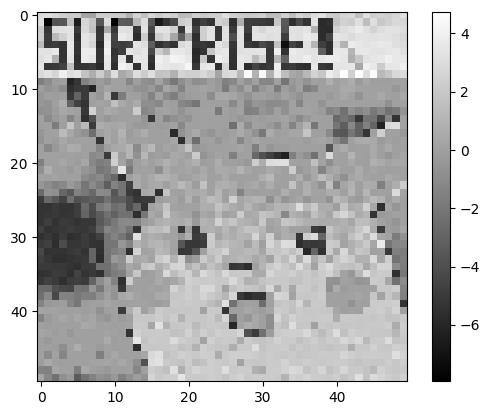

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Let's assume 'predictions' is your predicted vector
# predictions = model.predict(pred_data_standardized)  # Just as an example

# Reshape the predicted vector to 50x50
image_data = predictions.reshape(50, 50)

# Display the image
plt.imshow(image_data, cmap='gray')  # using grayscale colormap for visualization
plt.colorbar()  # to show the scale
plt.show()